In [145]:
import codecs
#http://docs.python-guide.org/en/latest/scenarios/scrape/

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import re
p_row = re.compile(r'<tr class="">(.*?)</tr>',re.DOTALL)
p_row2 = re.compile(r'<tr.*?>(.*?)</tr>',re.DOTALL)
p_cell = re.compile(r'<td.*?>(.*?)</td>',re.DOTALL)

p_name = re.compile(r'php">(.*?)</a>')
P_diff = re.compile(r'>(.*?)</a>')

So I had to check out **requests** because of the login

http://kazuar.github.io/scraping-tutorial/

In [5]:
import requests
#hash this as we'll be using it a lot
def get_page(url):
    return session_requests.get(
            url, 
            headers = dict(referer = url))

Set up a session with the site

In [6]:
session_requests = requests.session()

base_url = 'https://www.procyclingstats.com/'
login_url = base_url + 'login.php?'

#don't keep logins in a worksheet
import passwords_web
payload = passwords_web.payload

result = session_requests.post(
    login_url, 
    data = payload, 
    headers = dict(referer=login_url)
    )

we need to get all the stages so let's look here

In [18]:
itt_stages = []
for yy in range(1983,2019):
    print yy
    result = get_page( base_url + 'race/tour-de-france/%d/stages/winners'%yy)
    mm = p_row.findall(result.text)
    race_stages = [p_cell.findall(row) for row in  mm]
    ITT_stages = [ p_stage.search(x[1]).group(1) for x in race_stages[:] 
                                      if  '(itt)' in x[1].lower() ]
    
    itt_stages.append((yy, ITT_stages))

we picked the ITTs

In [326]:
itt_stages[:2]

[(1983,
  [u'race/tour-de-france/1983/stage-6',
   u'race/tour-de-france/1983/stage-15',
   u'race/tour-de-france/1983/stage-19',
   u'race/tour-de-france/1983/stage-21']),
 (1984,
  [u'race/tour-de-france/1984/stage-7',
   u'race/tour-de-france/1984/stage-16',
   u'race/tour-de-france/1984/stage-22'])]

In [12]:
print base_url + 'race/tour-de-france/%d/stages/winners'%2001

https://www.procyclingstats.com/race/tour-de-france/2001/stages/winners


In [13]:
p_stage = re.compile(r'<a  class="" href="(.*?)">')
p_stats = re.compile('<span class="sprite stats2"></span>(.*?)</div>', re.DOTALL)
p_bold = re.compile('<b>(.*?)</b>')

Pull the raw pages to a pair of lists
- results from the race

this might be a bit complicated because of bad data....


In [23]:
import time

result_pages = []

for yy,urls in itt_stages:
    tt = []
    for xx in urls:
        url = base_url + xx
        print url
        tt.append(get_page(url))
        time.sleep(5)
    result_pages.append(tt)


https://www.procyclingstats.com/race/tour-de-france/1983/stage-6
https://www.procyclingstats.com/race/tour-de-france/1983/stage-15
https://www.procyclingstats.com/race/tour-de-france/1983/stage-19
https://www.procyclingstats.com/race/tour-de-france/1983/stage-21
https://www.procyclingstats.com/race/tour-de-france/1984/stage-7
https://www.procyclingstats.com/race/tour-de-france/1984/stage-16
https://www.procyclingstats.com/race/tour-de-france/1984/stage-22
https://www.procyclingstats.com/race/tour-de-france/1985/stage-8
https://www.procyclingstats.com/race/tour-de-france/1985/stage-13
https://www.procyclingstats.com/race/tour-de-france/1985/stage-21
https://www.procyclingstats.com/race/tour-de-france/1986/stage-9
https://www.procyclingstats.com/race/tour-de-france/1986/stage-20
https://www.procyclingstats.com/race/tour-de-france/1987/stage-10
https://www.procyclingstats.com/race/tour-de-france/1987/stage-18
https://www.procyclingstats.com/race/tour-de-france/1987/stage-24
https://www.pr

In [32]:
result_pages[0]

[<Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>]

In [212]:
#I don't think I need the DOTALL but...
p_data = re.compile('<a href="(.*?)">.*?<a href="(.*?)">.*?'
                    '(\d+\.\d+).*?'
                   '<span class="timelag">(.*?)</span>',re.DOTALL)

p_stage_data = re.compile('<span class="red" style="font: 21px tahoma; ">\((\d|\.)+k\)</span>')

stage_results = [ [] for x in range(1983,2019)]
for i, yy in enumerate(result_pages[:]):
    # a bit verbose but I was having trouble with None
    #because there was a gotcha in the first stage data
    #the results aren't the first table in the page
    for j,x in enumerate(yy):
        stage_results[i].append([])
        #mm = p_stage_data.search(x.text)
        #print mm
        try:
            #I changed x to y in the for but not in the if 
            #resulted in really strange behavior - cell took forever to run
            rows = [ y for y in p_row2.findall(x.text) if 'class="time "' in y]
            #careful only taking top 30
            for row in rows[0:30]:
                #there's another hidden table on stage 24 1987
                #so u have to try to get rid of it this no work:
                if 'xhide" data-name="gc' not in row: continue
                if 'DNS' in row: continue
                mm = p_data.search(row)  
                stage_results[i][-1].append( mm.groups() )
        except:
            print 'FAIL>>', i  ,j, row

FAIL>> 4 2 <td  >1</th><td   class="xhide" data-name="bib" >198</th><td  ><span class="flags us"></span> <a href="rider/jeff-pierce"><span class="uppercase"> Pierce</span> Jeff</a></th><td   class="xhide" data-name="age" >28</th><td  ><a href="team/7-eleven-1987">7 Eleven - Hoonved</a></th><td  >100</th><td style=" text-align: right; "  class="xhide" data-name="gc" >88</th><td style=" text-align: right; "  class="xhide" data-name="gc" >+2:42:22</th><td style=" text-align: right; " ><span class="timelag">4:57:16</span> <span class="time ">4:57:16</span></th>
FAIL>> 20 0 <td  >1</th><td  ><span style="font-size: 10px; color: #777; ">9</span></th><td  ><span style="color: #6DB84F; font-size: 10px; ">&#x25B2;8</span></th><td   class="xhide" data-name="bib" >8</th><td  ><span class="flags co"></span> <a href="rider/victor-hugo-pena"><span class="uppercase"> PeÃ±a</span> Victor Hugo</a></th><td   class="xhide" data-name="age" >28</th><td  ><a href="team/us-postal-service-2003">US Postal Serv

In [239]:
stage_results[0][0][2]

(u'rider/julian-gorospe', u'team/reynolds-1983', u'43.673', u'1:07')

So we'll dump the cleaned data - 
since there are no user classes involved
we'll just pickle it for later.

In [263]:
import pickle

with file('itt.pkl','wb') as fp:
    pickle.dump(cleaned, fp)

In [240]:
cleaned = [ [zip(*x) for x in yy] for yy in stage_results]
cleaned[0][0][2]

(u'44.294',
 u'43.875',
 u'43.673',
 u'43.664',
 u'43.482',
 u'43.473',
 u'43.176',
 u'43.132',
 u'43.087',
 u'42.866',
 u'42.840',
 u'42.796',
 u'42.691',
 u'42.682',
 u'42.638',
 u'42.499',
 u'42.405',
 u'42.396',
 u'42.387',
 u'42.336',
 u'42.327',
 u'42.301',
 u'42.259',
 u'42.216',
 u'42.199',
 u'42.156',
 u'42.131',
 u'42.105',
 u'42.105',
 u'42.097')

In [315]:
just_times = []
for yy in cleaned: 
    just_times.append([(x[-2],x[-1]) for x in yy if x] )
        
len(just_times)

36

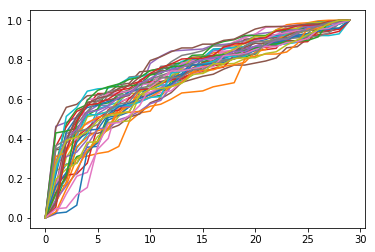

In [324]:

for k,yy in enumerate(just_times[:]):   
    for pp in yy:
        avg, X = pp
        
        if max([a - b for a, b in zip(X[1:], X[2:])]) > 0: continue
        Y = np.array([float(x) for x in X])
        if Y[0] == Y[1] : continue

        #normalise the data
        Y[0] = 0.
        Y /= max(Y)
        
        #calculate a linear interpolation
        Z = np.linspace(0,29,30)
        #Y[0], Y[-1]  = 0, 1
        m = (Y[-1] - Y[0])/29.
        Z = Z*m + Z[0]
        
        #so we'll the L^2 difference between
        #data andd linear interpolation
        dev = np.linalg.norm(Y-Z)
        
        #keep just the ones with a big norm
        if dev < 1.: continue
        plt.plot(Y)

        

    

248.76889981917225

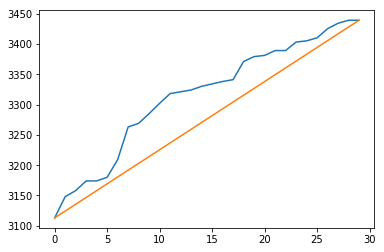

In [219]:
X = cleaned[13][0][-1]
X = [X[0]] + [x + X[0] for x in X[1:]]
X = np.array(X)
Y = np.linspace(0,29,30)
m = (X[-1] - X[0])/29.
Y = Y*m + X[0]

plt.plot(X)
plt.plot(Y)

np.linalg.norm(X-Y)

In [241]:
def str2time(tt):
    bits = [int(y) for y in reversed(tt.split(':'))]
    return sum( y*60**i for i, y in enumerate(bits) )


xs = []
duds = []
for yy, tdf  in enumerate(cleaned):
    #print yy + 1983
    for k, itt in enumerate(tdf):
        #we are going to overwrite the times which is itt[-1]
        if not itt: continue
        rider_times = list(itt[-1])
        xs.append(rider_times[0])
        duds.extend( x for x in rider_times if ':' not in x)
        for i,x in enumerate(rider_times):
            if ':' in x: continue
            #this means there is a " in the times so
            rider_times[i] = rider_times[i-1]
            
        #so we'll make the times a numpy array
        TS  = np.array( [str2time(t) for t in rider_times] )
        winner_t = TS[0]
        TS[ TS - winner_t > 0 ] -= winner_t
        tdf[k][-1] = TS
        
        tdf[k][-2] = np.array([float(x) for x in itt[-2]])
        


In [293]:
T = np.copy(cleaned[0][0][-1])
x, T[0] = T[0], 0
T += x
AV = cleaned[0][0][-2]
#careful casting doesn't work well
AV*T /3600

array([ 58.00053222,  58.0003125 ,  58.00017028,  58.00034667,
        58.00015667,  58.0002275 ,  57.99976   ,  58.00055889,
        57.99988944,  58.00007944,  58.0006    ,  58.00046778,
        58.00046694,  58.00009556,  57.99952389,  57.99932972,
        58.00061667,  58.00008333,  57.999545  ,  58.00032   ,
        57.9997475 ,  57.99937111,  58.0004775 ,  58.00009333,
        58.00018111,  57.99963   ,  58.00034333,  57.9996375 ,
        57.9996375 ,  58.00031111])

In [301]:
dd = []

for k,yy in enumerate(just_times[:]):   
    for pp in yy:
        avg, X = pp
        yr, dist =  k + 1983, (avg*X/3600.)[0]
        
        if max([a - b for a, b in zip(X[1:], X[2:])]) > 0: continue
        Y = np.array([float(x) for x in X])
        if Y[0] == Y[1] : continue

        Y[0] = 0.
        Y /= max(Y)
        Z = np.linspace(0,29,30)
        m = (Y[-1] - Y[0])/29.
        Z = Z*m + Z[0]
        dev = np.linalg.norm(Y-Z)
        dd.append((k + 1983,dist,dev,avg[0]))
        


In [302]:
dd[-5:]

[(2014, 54.000053333333334, 1.3099512713874335, 48.832000000000001),
 (2016, 37.499900000000004, 1.1759186329807012, 44.776000000000003),
 (2016, 17.000139166666667, 0.73387906634353961, 33.207000000000001),
 (2017, 22.500183333333329, 0.61571183321095824, 47.787999999999997),
 (2018, 31.000091111111114, 0.81656884237001226, 45.514000000000003)]

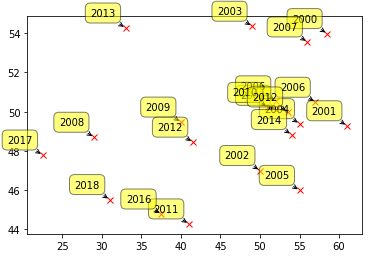

In [313]:
rr = [x for x in dd if x[-1] > 40 and 1999 < x[0] ]
YY, dist,dev,avg = zip(*rr)

labels = [str(x) for x in YY]
XS,YS = dist,avg
plt.plot(XS,YS,'rx')

for label, x, y in zip(labels, XS, YS):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-10, 10),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))


